### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import scipy.optimize as opt
import sympy
plt.style.use('ggplot')
from sympy.mpmath import *

%matplotlib inline

In [5]:

df = pd.read_csv('2008.csv',sep=',')
#К сожалению, мощности моего ноутбука не хватило для работы с данным файлом, 
#поэтому все дальнейшие выводы были сделаны для его сокращенной версии. Однако код должен работать и с полной версией файла.

KeyboardInterrupt: 

In [ ]:
df.head(4)

In [ ]:
k = df.groupby('UniqueCarrier').size()
k=k.sort_values(ascending=False)
k[0:10]

**Задание 2:** Построить распределение причин отмены рейсов

In [ ]:
df.groupby('CancellationCode').size()
df.groupby('CancellationCode').size().plot((kind='bar')


**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [ ]:
l=(df.groupby(['Origin','Dest']).size().sort_values(ascending=False))
print(l.argmax())
a=(l.argmax()[0])
b=(l.argmax()[1])
df[(df['Origin'] == a) & (df['Dest'] == b)].describe()

**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [4]:
cd=df.loc[:,['FlightNum','CarrierDelay','UniqueCarrier']]
cd.sort_values(['CarrierDelay'], ascending = False)[:5]

,FlightNum,CarrierDelay,UniqueCarrier
1018798,808,1455,NW
996512,4477,1351,MQ
1006701,218,1348,NW
1022917,1117,1200,NW
527950,2398,1158,AA


In [5]:
wd=df.loc[:,['FlightNum','WeatherDelay','UniqueCarrier']]
wd.sort_values(['WeatherDelay'], ascending = False)[:5]

,FlightNum,WeatherDelay,UniqueCarrier
435510,678,1049,NW
1031259,1719,951,NW
431592,472,876,NW
837194,943,846,UA
1009201,323,803,NW


In [6]:
nd=df.loc[:,['FlightNum','NASDelay','UniqueCarrier']]
nd.sort_values(['NASDelay'], ascending = False)[:5]

,FlightNum,NASDelay,UniqueCarrier
503727,1274,1357,AA
1030111,1639,1195,NW
990025,4209,914,MQ
487671,564,896,AA
984385,3982,761,MQ


In [7]:
sd=df.loc[:,['FlightNum','SecurityDelay','UniqueCarrier']]
sd.sort_values(['SecurityDelay'], ascending = False)[:5]

,FlightNum,SecurityDelay,UniqueCarrier
765444,4001,149,OO
177861,4123,136,OO
937219,559,135,F9
675303,1607,128,WN
874981,1404,120,US


In [8]:
lad=df.loc[:,['FlightNum','LateAircraftDelay','UniqueCarrier']]
lad.sort_values(['LateAircraftDelay'], ascending = False)[:5]

,FlightNum,LateAircraftDelay,UniqueCarrier
1018915,821,1143,NW
1018798,808,1002,NW
425649,218,897,NW
1018486,802,889,NW
862210,1084,805,US


**Задание 5:** Определить, как распределено количество рейсов от времени дня?

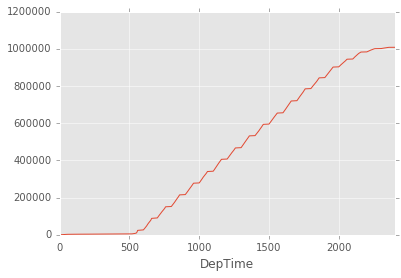

In [180]:

n=df.groupby('DepTime').size()
n = n.cumsum()
n.plot()

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

In [6]:
# Your code here..


### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [196]:
table13=pd.read_csv('table13.csv',sep=',')
table14=pd.read_csv('table14.csv',sep=',')
state13=pd.Series(table13['State'].unique())
state14=pd.Series(table14['State'].unique())
same_states=state13.isin(state14)
print(same_states.value_counts())
#True - same states
#False - different


True     48
False     2
dtype: int64


**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [206]:
print(table14.shape)
print(table13.shape)
print(table14.shape[0])

(12826, 8)
(1826, 15)
12826


In [198]:
total=pd.concat([table13,table14],axis=1)

**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [199]:
total.dropna()


,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,...,4th quarter,Population,State,Agency Type,Agency Name,Q1,Q2,Q3,Q4,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,...,1,"39,481",Alabama,Cities,Ashford,0,0,0,0,"2,177"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,...,0,"84,139",Alabama,Cities,Ashland,0,0,0,0,"1,926"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,...,0,"35,154",Alabama,Cities,Auburn,0,0,0,0,"57,970"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,...,0,"299,455",Alabama,Cities,Childersburg,0,0,0,0,"5,111"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,...,0,"78,905",Alabama,Cities,Demopolis,0,0,0,0,"7,240"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,...,0,"5,034",Alabama,Cities,Eclectic,0,0,0,0,"1,015"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,...,0,"32,837",Alabama,Cities,Enterprise,0,0,0,0,"28,145"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,...,0,"225,232",Alabama,Cities,Eutaw,0,0,0,0,"2,871"
10,Arizona,Cities,Glendale,2,3,1,1,0,0,0,...,2,"234,006",Alabama,Cities,Fairhope,0,0,0,0,"16,847"
12,Arizona,Cities,Maricopa,1,0,0,0,0,0,0,...,1,"44,871",Alabama,Cities,Gadsden,0,0,0,0,"36,610"


In [219]:
#Исчезла в том числе часть строк из table14 из-за разницы в количестве строк.Добавим лишние строки в table13

table= pd.DataFrame(np.zeros([table14.shape[0]-table13.shape[0], table13.shape[1]]))
table.columns=table13.columns.values
print(table.shape)
table131=pd.concat([table13, table],axis=0)
print(table131.shape)
table14.shape


(11000, 15)
(12826, 15)


(12826, 8)

In [235]:

total2=pd.concat([table131, table14], axis=1, join_axes=[table131.index])
total.dropna()

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,...,4th quarter,Population,State,Agency Type,Agency Name,Q1,Q2,Q3,Q4,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,...,1,"39,481",Alabama,Cities,Ashford,0,0,0,0,"2,177"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,...,0,"84,139",Alabama,Cities,Ashland,0,0,0,0,"1,926"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,...,0,"35,154",Alabama,Cities,Auburn,0,0,0,0,"57,970"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,...,0,"299,455",Alabama,Cities,Childersburg,0,0,0,0,"5,111"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,...,0,"78,905",Alabama,Cities,Demopolis,0,0,0,0,"7,240"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,...,0,"5,034",Alabama,Cities,Eclectic,0,0,0,0,"1,015"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,...,0,"32,837",Alabama,Cities,Enterprise,0,0,0,0,"28,145"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,...,0,"225,232",Alabama,Cities,Eutaw,0,0,0,0,"2,871"
10,Arizona,Cities,Glendale,2,3,1,1,0,0,0,...,2,"234,006",Alabama,Cities,Fairhope,0,0,0,0,"16,847"
12,Arizona,Cities,Maricopa,1,0,0,0,0,0,0,...,1,"44,871",Alabama,Cities,Gadsden,0,0,0,0,"36,610"


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [11]:
# Your code here..


## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [7]:
honda=pd.read_csv('accord_sedan_training.csv')
honda.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


In [8]:

plt.style.use('ggplot')


M=honda['mileage'].values
P=honda['price'].values
mx= np.zeros([len(M), 2])
for i in range(len(M)):
    mx[i][0] = 1
    mx[i][1] = M[i]

Beta = np.linalg.inv((mx.T.dot(mx))).dot(mx.T).dot(P)

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [14]:
def L(a,b):
    return sum((P-a*M-b)**2) 

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [46]:

def grada (a,b):
    return diff(L,(a,b),(1,0))
def gradb (a,b):
    return diff(L,(a,b),(0,1))

In [254]:
def spusk(iter_max,alpha,precision):
    c=0
    d=0
    i=0
    while abs(grada(c,d)) > precision and abs(gradb(c,d)) > precision and i<iter_max:    
      c=c-alpha*(grada(c,d))
      d=d-alpha*(gradb(c,d))
      i+=1
    return (c,d)
spusk(5000,0.001,0.00001)

(mpf('2.0698772254864673e+27'), mpf('1.1484795279790845e+23'))

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

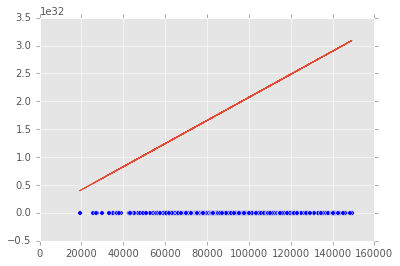

In [255]:
yk=lambda M:d+c*M


plt.plot(M, yk(M))
plt.scatter(M, P)

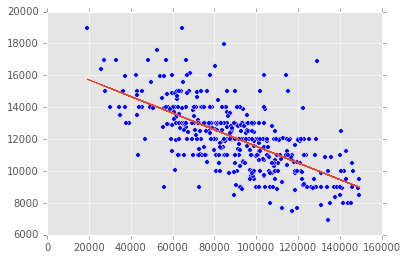

In [256]:
yk=mx.dot(Beta)

plt.scatter(mx[:,1], P)
plt.plot(mx[:,1], yk)